In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\Pratik'

In [3]:
#TO load csv file
tat=pd.read_csv("titanic.csv")


In [4]:
tat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#To show no. of records and columns
tat.shape

(891, 12)

In [6]:
tat['Fare'].idxmax()
print("Passenger with max fare")

Passenger with max fare


In [7]:
tat.iloc[258]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object

In [8]:
tat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
tat.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Missing Values

#There are 177 missing values in Age
#There are 687 missing values in Cabin(There are maximum value are missing so I will drop this column )
#There are 2 missing value in Embarked

In [11]:
#Dropping cabin column
tat.drop('Cabin',axis=1,inplace=True)

In [12]:
tat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
#Getting mean of age to fill null values 
tat['Age'].mean()


29.69911764705882

In [14]:
#Fillin missing values of age
tat['Age'].fillna(tat['Age'].mean(), inplace=True)

In [15]:
#Filling missing values for embarked

#Finding most count of value in embarked
tat['Embarked'].value_counts()

#S is appering most
tat['Embarked'].fillna('S',inplace=True)

In [16]:
#Checking how many passengers are traveling with sibling
tat['SibSp'].value_counts()

#By this we get that many passenger are traveling with single and 1 sibling

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
#Checking how many passengers are traveling with Parents
tat['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
tat.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 passenger 342 passengers only survived


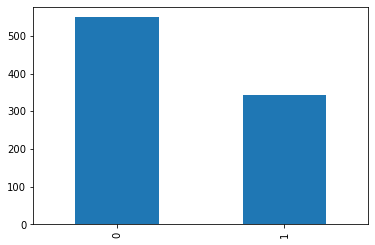

In [19]:
#Analising survived col



tat['Survived'].value_counts().plot(kind='bar')
print("Out of 891 passenger 342 passengers only survived")

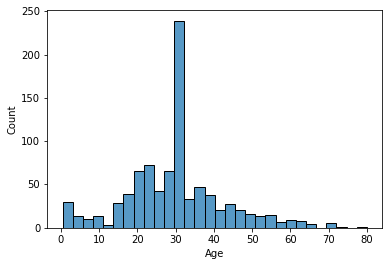

In [20]:
#Age Analisis
sns.histplot(tat['Age'])
plt.yticks()
plt.show()

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'warnings' is not defined

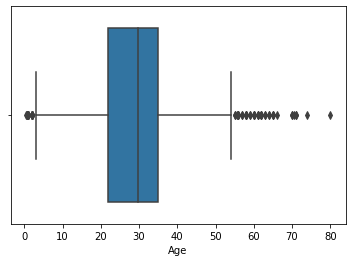

In [21]:
sns.boxplot(tat['Age'])
warnings.filterwarnings('ignore')

In [ ]:
#By Analising Age

print("People with age between 60 to 70 are",tat[(tat['Age']>60) & (tat['Age']<70)].shape[0])
print("People with age between 70 to 75 are",tat[(tat['Age']>=70) & (tat['Age']<=75)].shape[0])
print("People with age greater than 75 are",tat[tat['Age']>75].shape[0])


print('-'*30)

print("People with age between 0 and 1",tat[tat['Age']<1].shape[0])


In [ ]:
print("Most of the people are between 20 to 40 age ")

In [ ]:
#Handling outliers with age
tat=tat[tat['Age']<(tat['Age'].mean()+ 3 * tat['Age'].std())]
tat.shape


In [ ]:
#Analising Fare

sns.boxplot(tat['Fare'])
warnings.filterwarnings('ignore')

In [ ]:
print("People with fare betweet $200 and $300",tat[(tat['Fare']>200) & (tat['Fare']<300)].shape[0])
print("People with fare greater than $300",tat[tat['Fare']>300].shape[0])



In [ ]:
print("A Lot of people has cheaper ticktes")

In [ ]:
# seperate the data into numeric and categorical
df_num = tat[['Age','SibSp','Parch','Fare']]

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [ ]:
#Pclass col Analisis

print(tat['Pclass'].value_counts())

sns.countplot(tat['Pclass'])
warnings.filterwarnings('ignore')

In [ ]:
c=tat["Pclass"].value_counts()
print(c)
#To increce size of graph 
plt.figure(figsize=(8,8))
#visualization form : use pie
tat["Pclass"].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.show()
print("Most of people where traveling in class 3 Becasue it was cheaper tha 1 and 2 class")

In [ ]:
print((tat['Sex'].value_counts()/891)*100)

sns.countplot(tat['Sex'])

print("Around 64% of male & 36% of Female where traviling on ship")
warnings.filterwarnings('ignore')

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


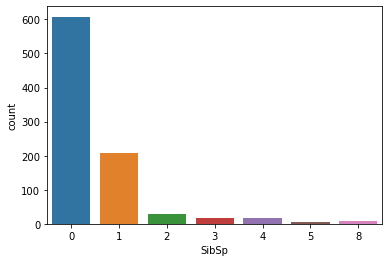

In [29]:
print((tat['SibSp'].value_counts()/891)*100)

sns.countplot(tat['SibSp'])
warnings.filterwarnings('ignore')

0    76.094276
1    13.243547
2     8.978676
3     0.561167
5     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


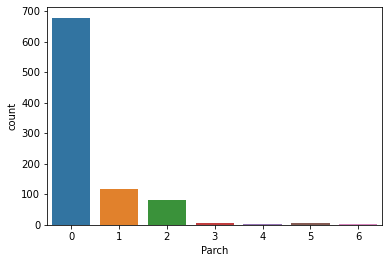

In [30]:
print((tat['Parch'].value_counts()/891)*100)

sns.countplot(tat['Parch'])
warnings.filterwarnings('ignore')

In [4]:
#Creating new col falmily which is sum of SibSp and Parch

tat['family_size']=tat['Parch'] + tat['SibSp']

In [32]:
tat.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,0
749,750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q,0
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,0,3101295,39.6875,NaN,S,0
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,1,13502,77.9583,D7,S,1
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S,0


In [7]:
#Code for clearly analising family col

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"
        

In [8]:
#Getting new col family type to make it more easy 
tat['family_type']=tat['family_size'].apply(family_type)

In [35]:
tat.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,1,PC 17758,108.9000,C65,C,1,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1,113803,53.1000,C123,S,1,Medium
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,0,Alone
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C,0,Alone
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,1,349237,17.8000,NaN,S,1,Medium


Alone     537
Medium    307
Large      47
Name: family_type, dtype: int64
Most of the passengers are traveling single


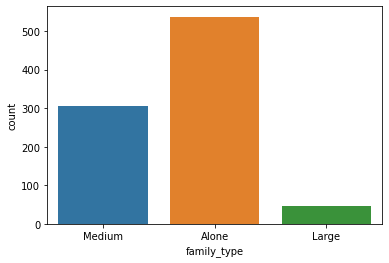

In [9]:
sns.countplot(tat['family_type'])
print(tat['family_type'].value_counts())
print("Most of the passengers are traveling single")
warnings.filterwarnings('ignore')

S    644
C    168
Q     77
Name: Embarked, dtype: int64
0    S Means Southampton
1      C Means Cherbourg
2     Q Means Queenstown
dtype: object


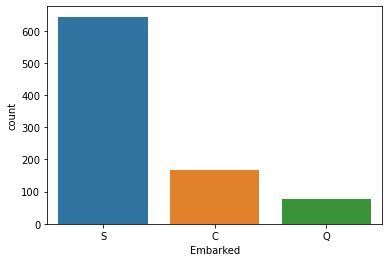

In [37]:
#Embarked analisis
print(tat['Embarked'].value_counts())

sns.countplot(tat['Embarked'])
warnings.filterwarnings('ignore')

x=("S Means Southampton","C Means Cherbourg","Q Means Queenstown")
a= pd.Series(x)
print(a)

By Analising I got that People where traviling from C (Cherbourg) where most survived


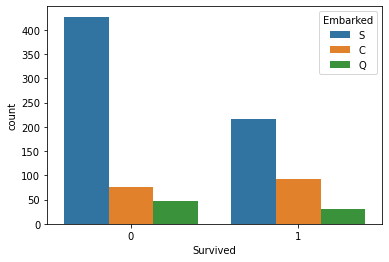

In [38]:
#Survived over Embarked
sns.countplot(tat['Survived'], hue=tat['Embarked'])
warnings.filterwarnings('ignore')
print("By Analising I got that People where traviling from C (Cherbourg) where most survived")


Passenger from Pclass 3 mostly where survived & from Pclass 1 most where survived


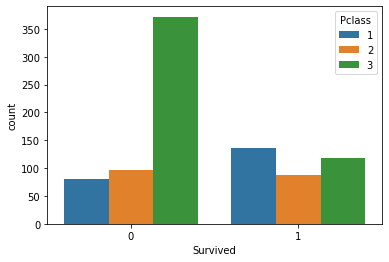

In [39]:
#Survival with Pclass

sns.countplot(tat['Survived'], hue=tat['Pclass'])

print("Passenger from Pclass 3 mostly where survived & from Pclass 1 most where survived")
warnings.filterwarnings('ignore')

Most numbers of females where survived from Ship


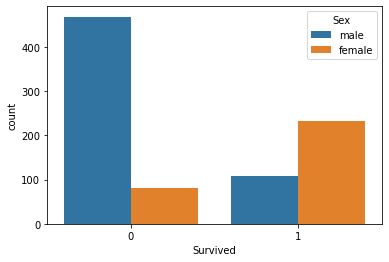

In [40]:
#Survived with Sex
import warnings
warnings.filterwarnings('ignore')
sns.countplot(tat['Survived'],hue=tat['Sex'])

print("Most numbers of females where survived from Ship")

In [41]:
#Survived over age
v= pd.DataFrame(tat['Age'].describe())
v


,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


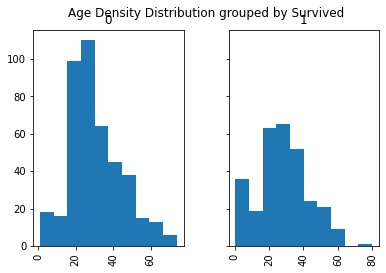

In [42]:
#Survived with Age
tat.hist(column="Age",by="Survived",sharey=True)

plt.suptitle('Age Density Distribution grouped by Survived');

In [44]:
print("We observe that the percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived.")

We observe that the percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived.


Suprisingly The family with medium size(means 1 or 2 members in family) where most survived


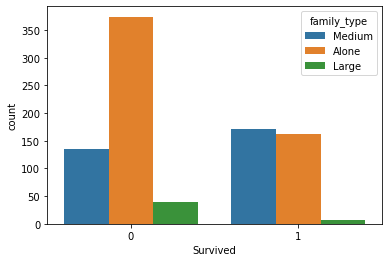

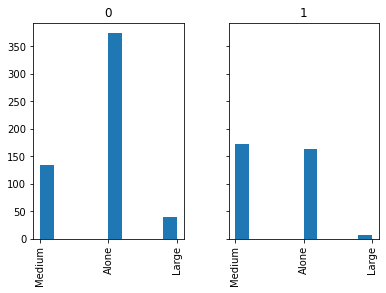

In [13]:
#Survived with Family
import warnings
warnings.filterwarnings('ignore')
sns.countplot(tat['Survived'],hue=tat['family_type'])

tat.hist(column="family_type",by="Survived",sharey=True)

print("Suprisingly The family with medium size(means 1 or 2 members in family) where most survived")

# Conclusion

1) Females and childs are mostly survived then Males

2) Travelling in Pclass 3 where mostly dead in accident

3) People travelling with smaller families had a higher chance of surviving 
   the accident in comparision to people with large family and alone

4) Many peoples where travelling in Pclass 3

5) Somehow people going to Cherbourg survived most

6) People in the range of 20 to 40 had higher chance of not surviving

7) Out of 891 passenger 342 passengers only survived

